In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import csv
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [20., 10.]
matplotlib.rcParams["font.size"] = "22"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

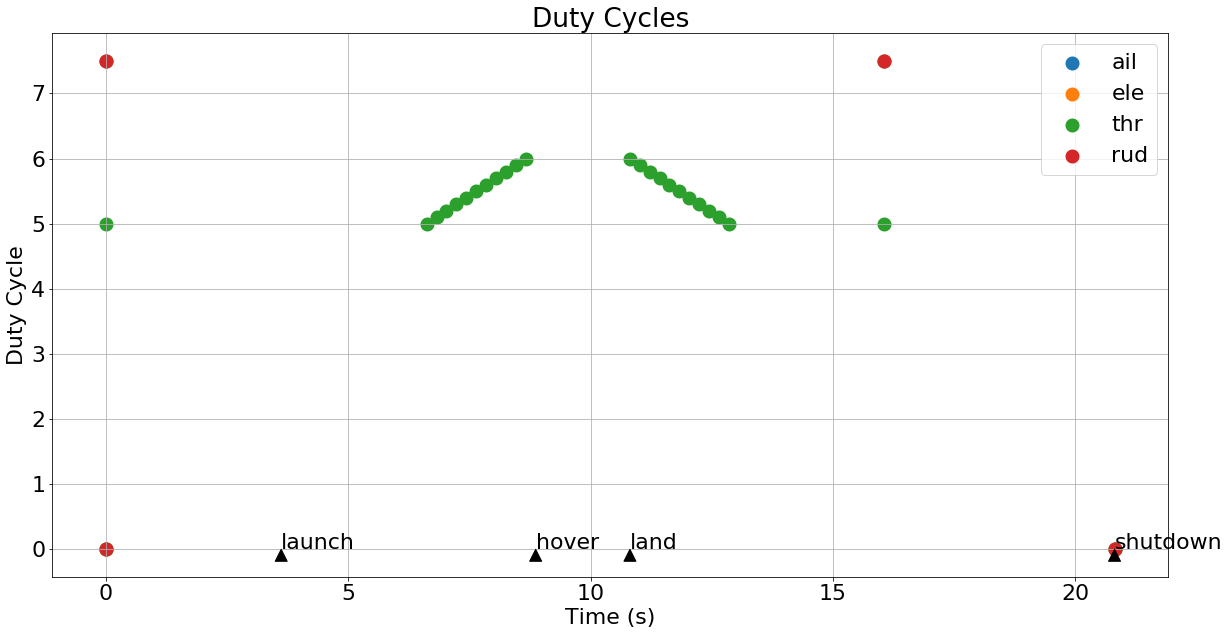

In [12]:
# Plot Results

pwms = {"ail": "pwm_7.csv", 
        "ele": "pwm_8.csv",
        "thr": "pwm_11.csv",
        "rud": "pwm_12.csv"}

mintime = None

for pwm in pwms:
    dat = []
    f = open(pwms[pwm], 'r')
    c = csv.DictReader(f)
    for row in c:
        if mintime is None:
            mintime = float(row['time'])
        elif float(row['time']) < mintime:
            mintime = float(row['time'])
        break
        


for pwm in pwms:
    dat = []
    
    f = open(pwms[pwm], 'r')
    c = csv.DictReader(f)
    for row in c:
        dat.append([float(row['time']), float(row['duty'])])

    xy = np.array(dat)
            
    x = xy[:,0] - mintime
    y = xy[:,1]
        
    plt.scatter(x, y, linewidths=8)
    
f = open("fsm.csv", 'r')
c = csv.DictReader(f)
for row in c:
    if mintime is None:
        mintime = float(row['time'])
    elif float(row['time']) < mintime:
        mintime = float(row['time'])
        
    plt.annotate(row['state'], (float(row['time']) - mintime, -0.0), arrowprops=dict(facecolor='black', shrink=0.05))


    
plt.legend([pwm for pwm in pwms])
plt.title("Duty Cycles")
plt.xlabel("Time (s)")
plt.ylabel("Duty Cycle")
plt.show()